In [1]:
import requests
from bs4 import BeautifulSoup
import re
import json
from selenium import webdriver

In [2]:
def getResponse(url, param = {}):
    headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'
    }
    response = requests.get(url=url, headers=headers, params=param)
    return response

In [3]:
# 获取页面的html文件
def getHTML(url):
    return getResponse(url).text

In [29]:
# 通过音频源地址爬取音频
def getAudio(url):
    response = getResponse(url)
    path = 'audio/'
    fileName = url.split('/')[-1]
    with open(path + fileName, 'wb') as fp:
        fp.write(response.content)
    print(fileName, "  successful")

In [5]:
# https://www.ximalaya.com/revision/play/v1/audio?id=400018910&ptype=1
"""
id: 400018910
ptype: 1
"""

'\nid: 400018910\nptype: 1\n'

In [6]:
# https://www.ximalaya.com/jiankang/12282259/p35/
# p1 -> p39

In [8]:
html = getHTML('https://www.ximalaya.com/jiankang/12282259/p35/')

In [9]:
soup = BeautifulSoup(html, 'lxml')

<!DOCTYPE html>
<html><head><title>医疗晨报在线收听-喜马拉雅</title><meta charset="utf-8"/><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="医疗晨报,健康,健康知识" name="keywords"/><meta content="欢迎收听医疗晨报，您可以免费在线收听或下载医疗晨报中的所有优质音频内容，更多精彩，尽在喜马拉雅FM。" name="description"/><meta content="IE=Edge,chrome=1" http-equiv="X-UA-Compatible"/><meta content="webkit" name="renderer"/><meta content="chrome=1" http-equiv="X-UA-Compatible"/><meta content="pc,mobile" name="applicable-device"/><meta content="no-transform" http-equiv="Cache-Control"/><meta content="no-siteapp" http-equiv="Cache-Control"/><meta content="Ndgaz7H1uQvWACwf_q2IxyLYxBnomEREr1P_EsPq1GI" name="google-site-verification"/><meta content="医疗晨报在线收听-喜马拉雅" property="og:title"/><meta content="欢迎收听医疗晨报，您可以免费在线收听或下载医疗晨报中的所有优质音频内容，更多精彩，尽在喜马拉雅FM。" property="og:description"/><link href="https://www.ximalaya.com/" rel="canonical"/><link href="//s1.xmcdn.com" rel="dns-prefetch"/><link href="//imagev2.xmcdn.com" rel="dns-prefetch"/><link href="//f
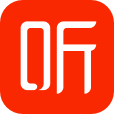

In [10]:
print(soup)

In [ ]:
#<a title="2018年5月7日医疗晨报" href="/jiankang/12282259/86961129"><span class="title lF_">2018年5月7日医疗晨报</span></a>

In [15]:
linkLists = []
for a in soup.find_all('a', href=True): 
    if a.get_text(strip=True):
        #print(a['href'])
        matchObj = re.match(r'/jiankang/12282259/[1-9]', a['href'], re.I)
        if matchObj:
            #print(a['href'])
            linkLists.append('https://www.ximalaya.com/'+a['href'])

In [16]:
def getAllUrlOfEveryPage(url):
    html = getHTML(url)
    soup = BeautifulSoup(html, 'lxml')
    linkLists = []
    for a in soup.find_all('a', href=True): 
        if a.get_text(strip=True):
            #print(a['href'])
            matchObj = re.match(r'/jiankang/12282259/[1-9]', a['href'], re.I)
            if matchObj:
                #print(a['href'])
                linkLists.append('https://www.ximalaya.com/'+a['href'])
    return linkLists

In [17]:
for link in getAllUrlOfEveryPage('https://www.ximalaya.com/jiankang/12282259/p35/'):
    print(link)

https://www.ximalaya.com//jiankang/12282259/86961129
https://www.ximalaya.com//jiankang/12282259/86760028
https://www.ximalaya.com//jiankang/12282259/86568760
https://www.ximalaya.com//jiankang/12282259/86390655
https://www.ximalaya.com//jiankang/12282259/86198866
https://www.ximalaya.com//jiankang/12282259/85998627
https://www.ximalaya.com//jiankang/12282259/85807649
https://www.ximalaya.com//jiankang/12282259/85649314
https://www.ximalaya.com//jiankang/12282259/85477986
https://www.ximalaya.com//jiankang/12282259/85309256
https://www.ximalaya.com//jiankang/12282259/85113931
https://www.ximalaya.com//jiankang/12282259/84920513
https://www.ximalaya.com//jiankang/12282259/84711820
https://www.ximalaya.com//jiankang/12282259/84498793
https://www.ximalaya.com//jiankang/12282259/84283393
https://www.ximalaya.com//jiankang/12282259/84063477
https://www.ximalaya.com//jiankang/12282259/83857194
https://www.ximalaya.com//jiankang/12282259/83689150
https://www.ximalaya.com//jiankang/12282259/83

In [ ]:
# https://www.ximalaya.com/revision/play/v1/audio?id=400018910&ptype=1
# url = f'http://www.lrts.me/ajax/path/4/{book_id}/{chapter_id}'

In [22]:
def getAudioDownloadUrl(url):
    obj_json = getResponse(url).json()
    return obj_json['data']['src']

In [30]:
for i in range(1, 4):
    pageUrl = f'https://www.ximalaya.com/youshengshu/46117522/p{i}/'
    print(pageUrl)
    linkLists = getAllUrlOfEveryPage(pageUrl)
    print(len(linkLists))
    for link in linkLists:
        id = link.split('/')[-1]
        # https://www.ximalaya.com/revision/play/v1/audio?id=86961129&ptype=1
        audioUrl = f'https://www.ximalaya.com/revision/play/v1/audio?id={id}&ptype=1'
        downloadUrl = getAudioDownloadUrl(audioUrl)
        #print(downloadUrl)
        getAudio(downloadUrl)
    print(f'page {i} successful')

https://www.ximalaya.com/youshengshu/46117522/p1/
0
page 1 successful
https://www.ximalaya.com/youshengshu/46117522/p2/
0
page 2 successful
https://www.ximalaya.com/youshengshu/46117522/p3/
0
page 3 successful
